In [208]:
import csv
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as snNew

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [209]:
train_file_name = "mydata.csv" # mydata
test_file_name = "mydata_test.csv" # mydata_test

In [210]:
header = None
x_train = list()
y_train = list()
with open(train_file_name,'r', encoding='utf-8') as f:
    rows = csv.reader(f)
    # 以迴圈輸出每一列
    for row in rows:
        if header == None:
            header = row
            continue
        for i in range(10):
            row[i] = float(row[i])
        for i in range(10,13):
            row[i] = bool(row[i])
        for i in range(13,17):
            row[i] = int(row[i])
        x_train.append(row[:-1])
        y_train.append(row[-1])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [211]:
header = None
x_test = list()
y_test = list()
with open(test_file_name,'r', encoding='utf-8') as f:
    rows = csv.reader(f)
    # 以迴圈輸出每一列
    for row in rows:
        if header == None:
            header = row
            continue
        for i in range(10):
            row[i] = float(row[i])
        for i in range(10,13):
            row[i] = bool(row[i])
        for i in range(13,17):
            row[i] = int(row[i])
        x_test.append(row[:-1])
        y_test.append(row[-1])
x_test = np.array(x_test)
y_test = np.array(y_test)

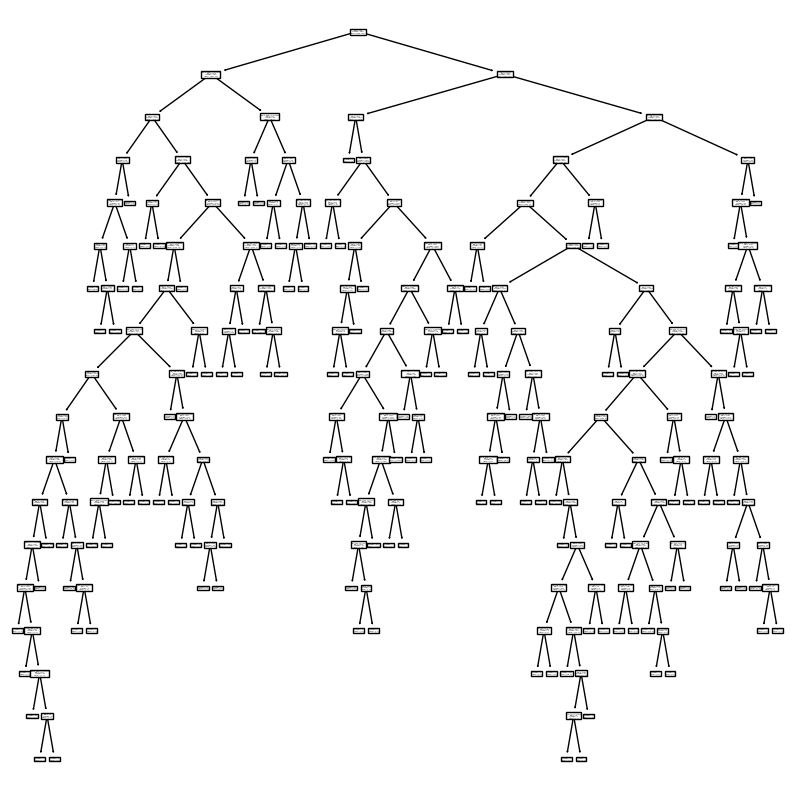

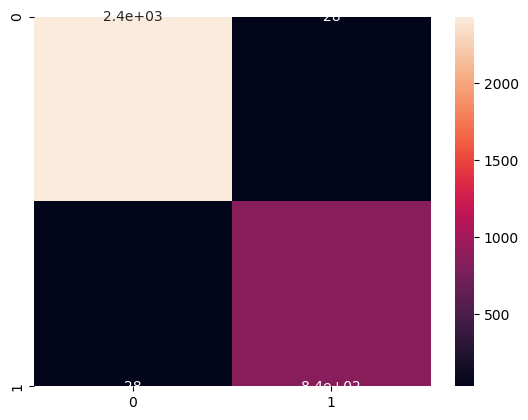

In [212]:
clf_tree = tree.DecisionTreeClassifier(random_state=1234)
model_tree = clf_tree.fit(x_train, y_train)
plt.figure(figsize=(10,10))
tree.plot_tree(model_tree,feature_names=header)
plt.show()
y_predict = clf_tree.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()

X_pca.shape: (6666, 2)


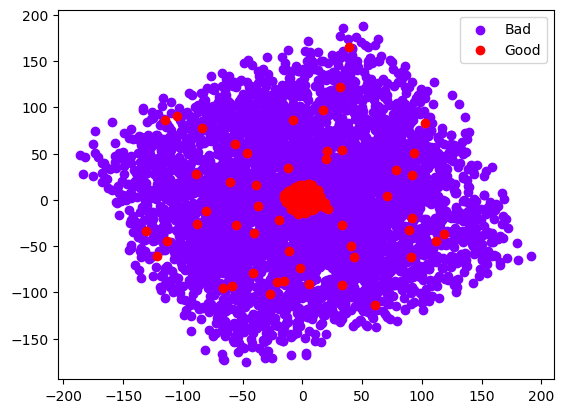

In [213]:
str = ["Bad", "Good"]
colors = cm.rainbow(np.linspace(0, 1, 2))
pca = PCA(n_components=2)
X_pca = pca.fit(x_train).transform(x_train)
print("X_pca.shape:", X_pca.shape)
for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], color=color, label=str[i])
plt.legend()
plt.show()

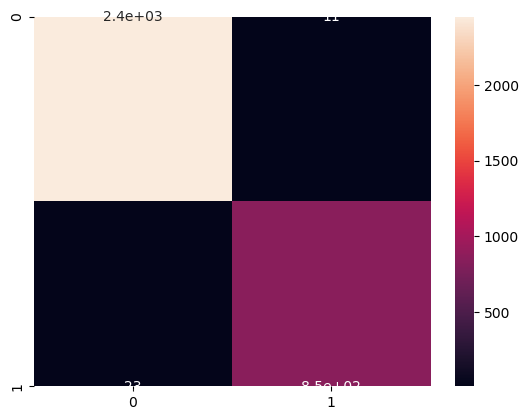

In [214]:
clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(x_train, y_train)
y_predict = clf_svm.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()

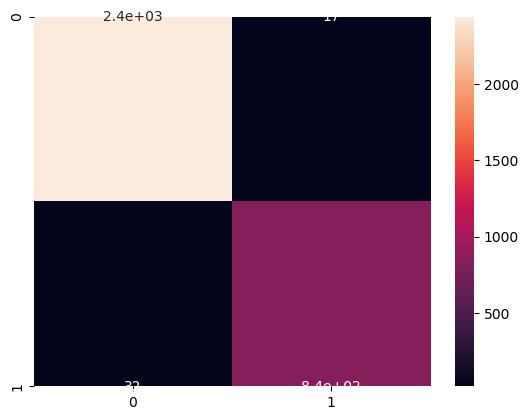

In [215]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)
y_predict = neigh.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()

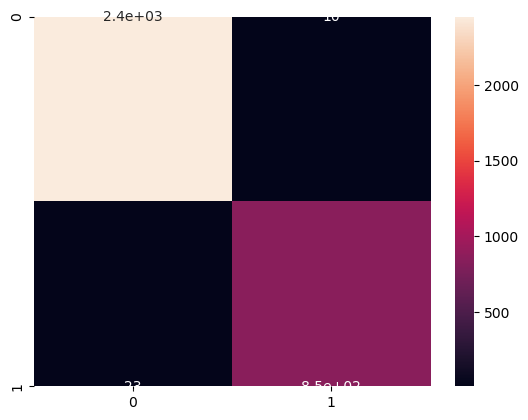

In [216]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predict = gnb.predict(x_test)
m = confusion_matrix(y_test, y_predict)
snNew.heatmap(m, annot=True)
plt.show()